<a href="https://colab.research.google.com/github/dooooing/2023_ESAA/blob/main/1124_%EC%A0%9C%EC%B6%9C__%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_4%2C_6~7_pg_87~95%2C_105~115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04. 모델 세부 설정



---


In [ ]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터 로드
mnist=tf.keras.datasets.mnist

#load_data()로 데이터 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

#데이터 정규화
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1 초기값 설정

Dense 레이어는 기본 초기화 방법으로 **Glorot Uniform** 초기화 방법 설정

In [ ]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

* 초기화 방법을 HeNormal로 변경하기 위해서는 **kernel_initializer** 매개변수에 설정
  + 문자열로 지정하는 방법, 클래스 인스턴스로 지정하는 방법


In [ ]:
#문자열 초기화
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


* 케라스에서 지원하는 초기화 목록
  + glorot_normal, glorot_uniform : 글로럿 초기화(Xavier 초기화)
  + lecun_normal, lecun_uniform : Yann Lecun 초기화
  + he_normal, he_uniform : He 초기화
  + random_normal, random_uniform : 정규 분포, 연속균등 분포 초기화

### 4-2 규제(Regularization)

모델의 과대적합을 해소하기 위해 L1, L2 규제 적용

* 기본적으로 규제를 적용하고 있지는 않다

In [ ]:
#기본값
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

* 규제를 적용하기 위해서는 **kernel_regularizer**에 규제 지정

In [ ]:
#L1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 4-3 드롭아웃(Dropout)

딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향 -> 과대적합 문제

드롭아웃 => 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어. 노드의 일부 신호를 임의로 삭제

* 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, **예측 시점에는 모든 노드들 활용**된다

* **Dropout** 레이어 함수에 입력하는 숫자 : 노드에서 제거되는 비율

In [ ]:
#Dropout 25% 비율 적용 (25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화(Batch Normalization)

배치 정규화 : 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일 정규화 -> 안정적인 훈련 가능. 성능 크게 향상

* 별도로 코드 구현할 필요x. 클래스 인스턴스 생성하여 추가

In [ ]:
#model A: Dense+ReLu
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model B: Dense+BatchNorm+ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

=> 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것 확인

더 크고 복잡한 데이터셋에 대해서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우 o

### 4-5 활성화(activation) 함수

주로 Dense 레이어에 ReLU 활성화 함수 지정.

활성화 함수 적용 시, 클래스 인스턴스로 선언하여 하이퍼파라미터 값 변경하여 적용 가능

In [ ]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [ ]:
#model C: Dense+BatchNorm+LeakyReLU(0,2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 (LeakyReLU, alpha=0.2) 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

* 3개 모델 훈련 후 수렴 속도 확인
  + model_a : Dense 레이어 + ReLU 활성화 함수
  + model_b : Dense 레이어 + 배치 정규화
  + model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A : Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model B : Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.2896 - accuracy: 0.9160 - val_loss: 0.1478 - val_accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1304 - accuracy: 0.9607 - val_loss: 0.1232 - val_accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0967 - accuracy: 0.9703 - val_loss: 0.1062 - val_accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.1127 - val_accuracy: 0.9662
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0981 - val_accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9825 - val_loss: 0.0979 - val_accuracy: 0.9711
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0912 - val_accurac

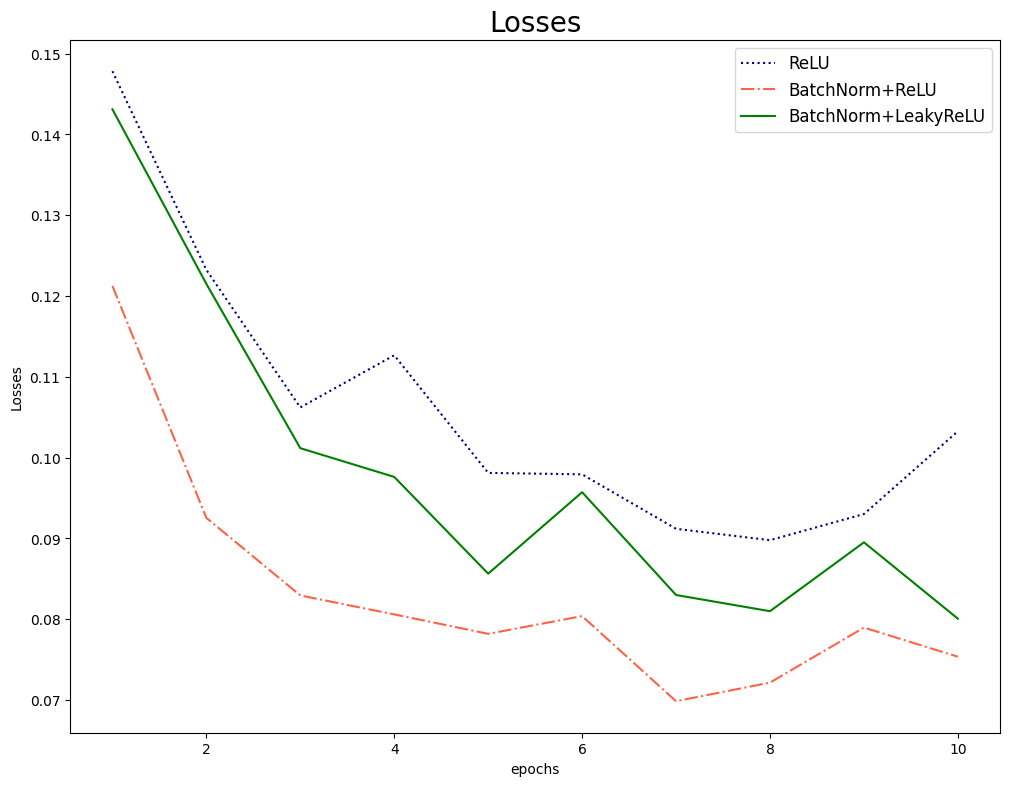

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

## 06. 모델 저장 및 불러오기



---



### 6-1 모델을 파일로 저장

**save()** 메소드 : 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스 저장

* 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정
* 저장 형식 : HDF5 포맷, SavedModel 포맷
* .h5 확장자 포함하는 경우 HDF5 포맷으로 저장. 대용량 저장

In [ ]:
#모델명을 h5 포맷으로 저장
model_b.save('h5-model.h5')

### 6-2 저장된 모델 복원

**tensorflow.keras.models.load_model()** 메소드 : 저장된 모델 복원

In [ ]:
#모델 복원
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

* 모델 검증해 복원 잘 되었는지 확인. evaluate 함수에 대입

In [ ]:
#모델 검증
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07537, acc: 0.97720


* .h5 확장자 생략하면 SavedModel 포맷으로 저장

In [ ]:
#모델을 SavedModel 포맷으로 저장
model_b.save('saved-model')

In [ ]:
#모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

* SavedModel형식과 HDF5 형식으로 저장 및 복원된 모델 동일한 성능

In [ ]:
#모델 검증 (HDF5 포맷)
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증 (SavedModel 포맷)
loss, acc=saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07537, acc: 0.97720
saved_model] loss: 0.07537, acc: 0.97720


## 07. 복잡한 모델 생성



---



### 7-1 함수형 API(Functional API)

**Functional API** : 복잡한 구조의 모델 정의 가능

<-> Sequential API : 단방향의 Sequential 모델만 구현가능. 데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델 구현할 수는 없다

* 함수형 API 사용하기 위해서는 Input 레이어 정의 -> 데이터의 입력 shape 정의 -> 레이어마다 반환하는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결

In [ ]:
import tensorflow as tf

#모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

* 레이어마다 **name** 매개변수로 이름 부여 가능

In [ ]:
#모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


=> inputs 매개변수로 입력층인 input_layer 지정, outputs 매개변수에 출력층 지정, name 매개변수에 이름 지정

* 복잡한 구조를 갖는 모델은 **plot_model** 모듈 활용하여 모델 구조도 시각화

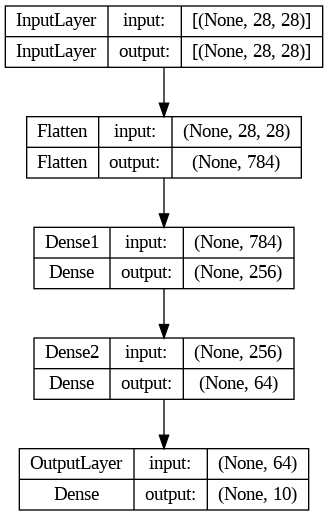

In [ ]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

=> show_shapes = True : 데이터의 입출력 shape 출력

show_layer_names = True : 레이어의 이름 출력

to_file : 파일명 입력하면 이미지 파일로 저장

* 함수형 API도 Sequential API와 동일한 방식으로 훈련

In [ ]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2110 - accuracy: 0.9384
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0875 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0607 - accuracy: 0.9808
Functional Model] loss: 0.06780, acc: 0.97870


## 7-2 모델 서브클래싱(Model Subclassing)

**Model** 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 만들 수 있다

* Model Subclassing으로 모델 인스턴스 생성하기 위해서는 tf.keras.Model 상속받아 생성하고자 하는 모델 클래스 구현
  + 모델의 __init__()함수에 레이어 정의하고, 레이어의 하이퍼파라미터 정의

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  #method overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x


* **call()** 함수 : fit() 메소드가 호출되어 훈련하는 경우 호출될 함수
  + 순전파 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결. 최종 출력 값 return

In [ ]:
#모델 생성
mymodel=MyModel()

#모델의 이름 설정
mymodel._name='subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


* mymodel 변수에 바로 summary()로 요약 출력 불가 -> Input 레이어와 함께 shape 정의해줘야 모델 요약 확인 가능

In [ ]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2172 - accuracy: 0.9357
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0869 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0589 - accuracy: 0.9813
Subclassing Model] loss: 0.07276, acc: 0.97700


=> Model Subclassing으로 생성된 모델도 동일하게 훈련, 검증 등 가능. 단지 모델을 생성하는 방식의 차이

### 7-3 서브클래싱 모델 파라미터를 활용한 생성

Model Subclassing 생성의 장점 : 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터 지정할 수 있다

* 모델 생성자 파라미터 추가해 동적으로 레이어의 유닛 개수 초기화

In [ ]:
class MyModel(tf.keras.Model):

  #생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  #class overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

* 기준이 되는 unit의 개수 입력받아 Dense 레이어의 유닛 개수 계산하여 설정

In [ ]:
#모델 생성
mymodel=MyModel(256, 10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


=> summary 결과 확인시 동적으로 설정한 레이어의 파라미터 초기화되었음

In [ ]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2081 - accuracy: 0.9382
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0865 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0592 - accuracy: 0.9808
Subclassing Model w.parameters] loss: 0.08593, acc: 0.97480
